In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# dat = pd.read_csv('TempRep_pilot/sub-01/ses-01/sub-01_sess-01_task-TempRep_run-01_results.csv')
dats = []
for sub in ['01', '02', '03']:
#     sub = '03'
    for run in ['01', '02', '03']:
        pp_dat = pd.read_csv(f'TempRep_pilot/sub-{sub}/ses-01/sub-{sub}_sess-01_task-TempRep_run-{run}_results.csv')
        pp_dat['run'] = [run] * len(pp_dat)
        pp_dat['sub'] = [sub] * len(pp_dat)
        dats.append(pp_dat)
dat = pd.concat(dats)
dat

,target_times_s,target_times_f,response_times_s,response_times_f,resonse_diff_f,run,sub
0,0.533333,64,0.798509,96,-32,01,01
1,0.133333,16,0.557143,67,-51,01,01
2,1.066667,128,1.048703,126,2,01,01
3,0.266667,32,0.215380,26,6,01,01
4,0.133333,16,0.173778,21,-5,01,01
...,...,...,...,...,...,...,...
55,0.266667,32,0.340597,41,-9,03,03
56,2.133333,256,1.398965,168,88,03,03
57,0.533333,64,0.765635,92,-28,03,03
58,0.266667,32,0.257161,31,1,03,03


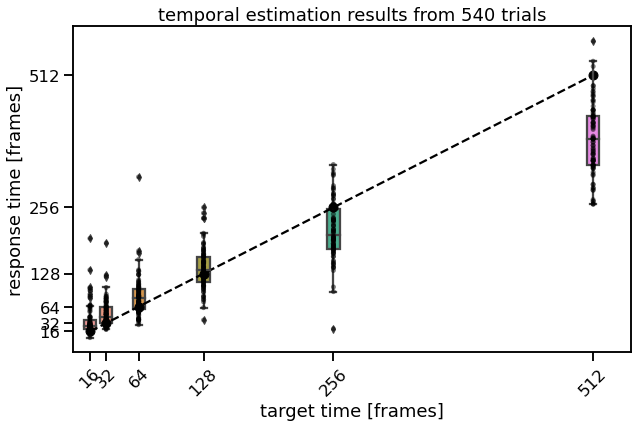

In [67]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize = (10,6))
x_positions = [16, 32, 64, 128, 256, 512] 
plt.plot([16, 32, 64, 128, 256, 512], [16, 32, 64, 128, 256, 512], marker = 'o', color = 'black', linestyle = '--')
# sns.scatterplot(data = dat, x = 'target_times_f', y = 'response_times_f', ax = ax)
sns.boxplot(data = dat, x = 'target_times_f', y = 'response_times_f', order=np.arange(600), width = 12)
sns.stripplot(data = dat, x = 'target_times_f', y = 'response_times_f', color='black', alpha=0.5, ax=ax, dodge = True, order=np.arange(550), )  # Overlay individual datapoints

ax.set_xticks(x_positions)
plt.xticks(rotation=45)
ax.set_yticks(x_positions)
# plt.xticks(rotation=45)
plt.xlabel('target time [frames]')
plt.ylabel('response time [frames]')
plt.title(f'temporal estimation results from {len(dat)} trials')
plt.savefig('temporal_estimation_group_pilot.png',facecolor = 'white')
plt.show()

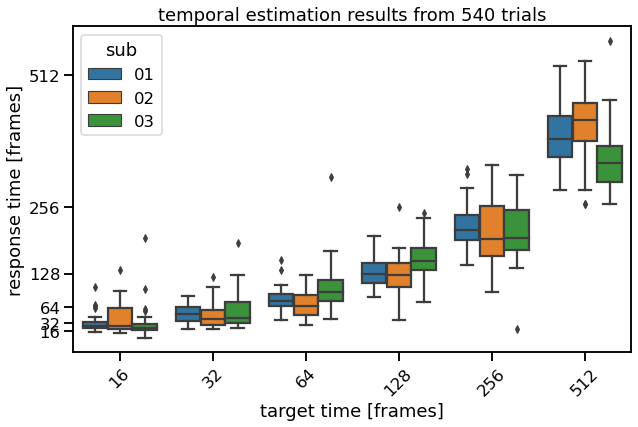

In [18]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize = (10,6))
x_positions = [16, 32, 64, 128, 256, 512] 
plt.plot([16, 32, 64, 128, 256, 512], [16, 32, 64, 128, 256, 512], marker = 'o', color = 'black', linestyle = '--')
# sns.scatterplot(data = dat, x = 'target_times_f', y = 'response_times_f', ax = ax)
sns.boxplot(data = dat, x = 'target_times_f', y = 'response_times_f', hue = 'sub')
# sns.stripplot(data = dat, x = 'target_times_f', y = 'response_times_f', color='black', alpha=0.5, ax=ax, dodge = True)  # Overlay individual datapoints

# ax.set_xticks(x_positions)
plt.xticks(rotation=45)
ax.set_yticks(x_positions)
# plt.xticks(rotation=45)
plt.xlabel('target time [frames]')
plt.ylabel('response time [frames]')
plt.title(f'temporal estimation results from {len(dat)} trials')

plt.show()

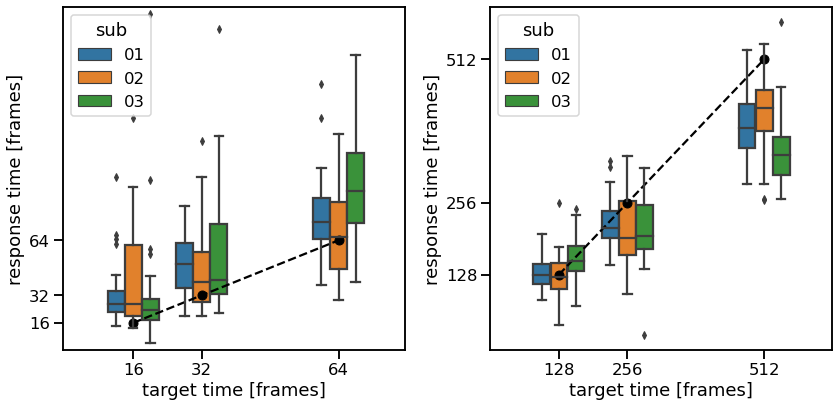

In [68]:
## short
sns.set_context("talk")
fig, axs = plt.subplots(1, 2, figsize = (12,6))
x_positions = [16, 32, 64] 
axs[0].plot([16, 32, 64], [16, 32, 64], marker = 'o', color = 'black', linestyle = '--')
# sns.scatterplot(data = dat, x = 'target_times_f', y = 'response_times_f', ax = ax)
sns.boxplot(data = dat[dat.target_times_f.isin(x_positions)], x = 'target_times_f', y = 'response_times_f', order=np.arange(80), hue = 'sub', width = 12, ax = axs[0])
# sns.stripplot(data = dat[dat.target_times_f.isin(x_positions)], x = 'target_times_f', y = 'response_times_f', color='black', alpha=0.5, ax=ax, order=np.arange(80))  # Overlay individual datapoints

axs[0].set_xticks(x_positions)
axs[0].set_yticks(x_positions)
axs[0].set_ylim(0, 200)

# plt.xticks(rotation=45)

x_positions = [128, 256, 512] 
axs[1].plot([128, 256, 512], [128, 256, 512], marker = 'o', color = 'black', linestyle = '--')
# sns.scatterplot(data = dat, x = 'target_times_f', y = 'response_times_f', ax = ax)
sns.boxplot(data = dat[dat.target_times_f.isin([128, 256, 512])], x = 'target_times_f', y = 'response_times_f', order=np.arange(640), width = 96, hue = 'sub', ax = axs[1])
# sns.stripplot(data = dat, x = 'target_times_f', y = 'response_times_f', color='black', alpha=0.5, ax=ax, dodge = True, order=np.arange(550), )  # Overlay individual datapoints

axs[1].set_xticks(x_positions)
axs[1].set_yticks(x_positions)

for ax in axs:
    ax.set_xlabel('target time [frames]')
    ax.set_ylabel('response time [frames]')
# plt.title(f'temporal estimation results from {len(dat[dat.target_times_f.isin(x_positions)])} trials')
plt.tight_layout()
# plt.savefig(plt.savefig('temporal_estimation_group_pilot.png'))
plt.savefig('temporal_estimation_subwise_pilot.png', facecolor = 'white')

plt.show()

In [45]:
dat[dat.target_times_f.isin(x_positions)]

,target_times_s,target_times_f,response_times_s,response_times_f,resonse_diff_f,run,sub
2,1.066667,128,1.048703,126,2,01,01
7,4.266667,512,2.407137,289,223,01,01
8,1.066667,128,0.957203,115,13,01,01
9,4.266667,512,2.898969,348,164,01,01
16,2.133333,256,1.615419,194,62,01,01
...,...,...,...,...,...,...,...
50,2.133333,256,1.932227,232,24,03,03
51,4.266667,512,3.665586,440,72,03,03
52,4.266667,512,3.557230,427,85,03,03
53,1.066667,128,1.715659,206,-78,03,03
